### Do not use Lambda Functions in kears layers in the model.....it reduces the accuracy 
###  it is only used when (Tensorflow + TF Hub + Keras versions) mismatches and throws error and stil we have to run the program 

# Transfer learning (TL) 
It is a research problem in machine learning (ML) / Deep Learning that focuses on storing knowledge gained while solving one problem and applying it to a different but related problem. For example, knowledge gained while learning to recognize cars could apply when trying to recognize trucks.

It has become much more popular and powerful in Deep Learning (DL).
Transfer learning is widely used and very effective, especially in: Image Classification, NLP (Natural Language Processing)

-> You freeze most of the pre-trained layers (so their weights don’t change).

-> You unfreeze some deeper layers and allow them to update.

-> Some weights and biases are updated again.

-> The knowledge is modified but not erased. The model refines what it already knows.


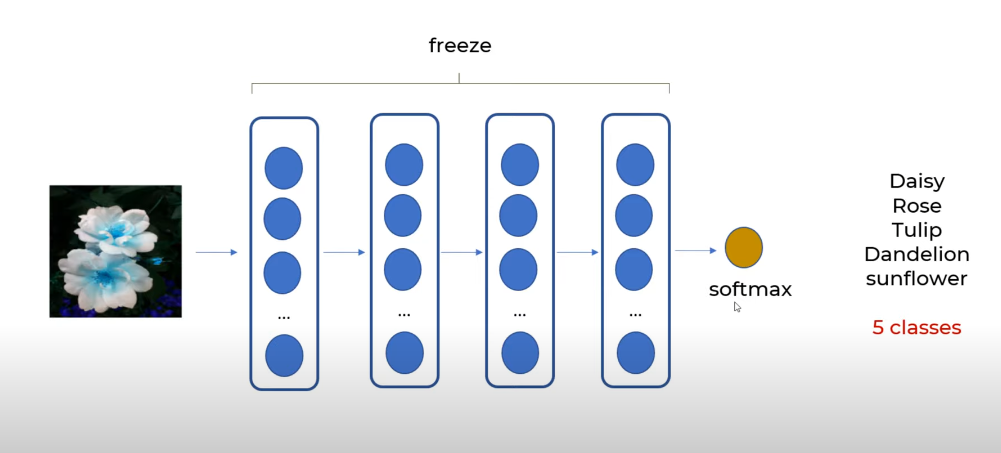


In this notebook we will use transfer learning and take pre-trained model from google's Tensorflow Hub and re-train that on flowers dataset. Using pre-trained model saves lot of time and computational budget for new classification problem at hand.

Install tensorflow_hub using pip install tensorflow_hub first

###                                               Transfer learning in image classification

In this notebook we will use transfer learning and take pre-trained model from google's Tensorflow Hub and re-train that on flowers dataset. Using pre-trained model saves lot of time and computational budget for new classification problem at .

Install tensorflow_hub using pip install tensorflow_hub first

In [55]:
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers


Make predictions using ready made model (without any training)

In [56]:
IMAGE_SHAPE = (224, 224)

model = tf.keras.Sequential([
    tf.keras.Input(shape=IMAGE_SHAPE+(3,)),
    tf.keras.layers.Lambda(
        lambda x: hub.KerasLayer(
            "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",
        )(x)
    )
])


In [57]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

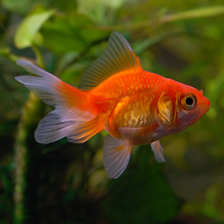

In [58]:
gold_fish = Image.open(r"C:\Users\Rajeev Ranjan\Desktop\Coding Folder\Projects\Jupyter NoteBook\datasets\goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

We do 
#### Feature Scaling ,
so that each feature gets equal importance and to increase the accuracy.

In [59]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

Most deep learning models in Keras / TensorFlow expect inputs in the form: (batch_size, height, width, channels)

batch_size → number of images you want to pass at once.

height, width, channels → dimensions of each image.

So if you want to classify just one image, you still need to wrap it in a batch of size 1.

gold_fish[np.newaxis, ...] :- (224, 224, 3)   →   (1, 224, 224, 3)

1 = batch size (1 image in the batch).

(224, 224, 3) = single image dimensions.

If you don’t add this extra dimension, the model will complain because it expects a batch (even if it’s just one image).

In [60]:
gold_fish[np.newaxis, ...]

array([[[[0.28235294, 0.33333333, 0.07058824],
         [0.31372549, 0.37254902, 0.09019608],
         [0.34901961, 0.41960784, 0.11764706],
         ...,
         [0.32941176, 0.39215686, 0.00392157],
         [0.32156863, 0.38431373, 0.00392157],
         [0.30980392, 0.36862745, 0.        ]],

        [[0.28627451, 0.33333333, 0.08235294],
         [0.3254902 , 0.38039216, 0.10980392],
         [0.35294118, 0.42352941, 0.12941176],
         ...,
         [0.32156863, 0.38039216, 0.00392157],
         [0.31372549, 0.37254902, 0.00392157],
         [0.30196078, 0.36078431, 0.        ]],

        [[0.28627451, 0.33333333, 0.08627451],
         [0.31372549, 0.36862745, 0.10196078],
         [0.34509804, 0.41568627, 0.12941176],
         ...,
         [0.31764706, 0.37647059, 0.00392157],
         [0.30980392, 0.36862745, 0.00784314],
         [0.29803922, 0.35686275, 0.00392157]],

        ...,

        [[0.05490196, 0.10980392, 0.01568627],
         [0.05098039, 0.11372549, 0.01960784]

In [61]:
result = model.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


(1, 1001)

In [62]:
predicted_label_index = np.argmax(result) # by Softmax func :- rturns index(class) in the array which has highest value.
predicted_label_index

2

In [63]:
# Download ImageNet labels (1001 classes, including background)
labels_path = tf.keras.utils.get_file(
    'ImageNetLabels.txt',
    'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt'
)

In [92]:
with open(labels_path) as f:
    classes = f.read().splitlines() # returns a list :- each line as string at a particular index

classes[:5]    

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [93]:
classes[predicted_label_index]

'goldfish'

### Load flowers dataset

In [66]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

data_dir

'.\\datasets\\flower_photos'

In [67]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [68]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [69]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [70]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

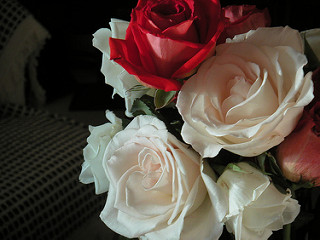

In [71]:
Image.open(str(roses[1]))

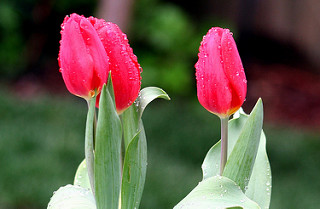

In [72]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[0]))

### Read flowers images from disk into numpy array using opencv

In [73]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [74]:
flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [75]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [76]:
img = cv2.imread(str(flowers_images_dict['roses'][0])) # Returns: a NumPy array of shape (height, width, channels)
img.shape

(240, 179, 3)

In [77]:
cv2.resize(img, (224,224)).shape # cv2.resize(img, (width, height))

(224, 224, 3)

In [78]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [79]:
X = np.array(X)
y = np.array(y)

### Train test split

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

### Preprocessing: scale images

In [81]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [82]:
X[0].shape

(224, 224, 3)

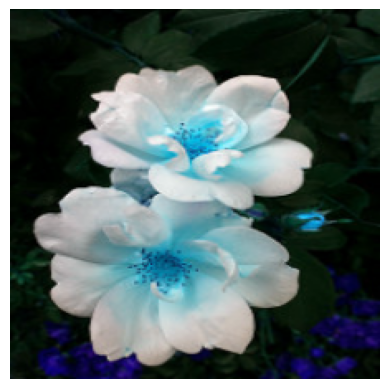

In [83]:
plt.axis('off')
plt.imshow(X[0])

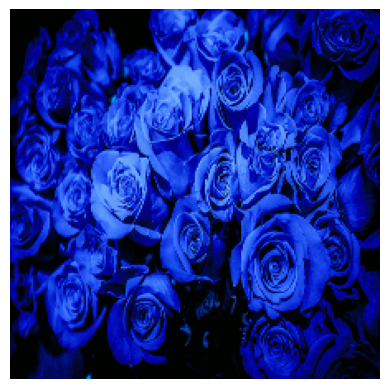

In [84]:
plt.axis('off')
plt.imshow(X[2])

In [91]:
predicted = model.predict(X[0:3])
predicted = np.argmax(predicted,axis=1)
predicted

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


array([795, 880, 795], dtype=int64)

In [96]:
classes[795] # showing wrong prediction via classification model

'shower curtain'

### Now take pre-trained model and retrain it using flowers images

In [100]:
# URL of the pretrained MobileNetV2 feature extractor (no top layer)
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

# Load the feature extractor from TF Hub -> without (top/output layer)
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, 
    input_shape=IMAGE_SHAPE + (3,),  # (224, 224, 3)
    trainable=False                  # freeze backbone (freeze the weights in this model)
)

In [102]:
num_of_flowers = 5

model1 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=IMAGE_SHAPE + (3,)),
    tf.keras.layers.Lambda(lambda x: pretrained_model_without_top_layer(x)),
    tf.keras.layers.Dense(num_of_flowers)
])

model1.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda_4 (Lambda)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │           6,405 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,405 (25.02 KB)

 Trainable params: 6,405 (25.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model1.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])

model1.fit(X_train_scaled, y_train, epochs=5)

In [104]:
model1.evaluate(X_test_scaled,y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 443ms/step - accuracy: 0.2793 - loss: 1.6094


[1.6094377040863037, 0.2792915403842926]

You can see that by data augmentation, dropout layer and batch normalization the accuracy of test set predictions will be increased.